---
title: "Classification: Fruit Recognition"
author: "Julia Chen"
date: "2023-11-29"
categories: []
image: "image.png"
---

<!-- # Blog Post 4: Classification - Fruit Recognition -->

This blog post will apply the topic of classification with detecting different types of fruit (peach, banana, guava). Classification is a supervised learning task that involves predicting which class/group something (e.g. an image) belongs in. For this post, we will mainly use a grid search approach using a support vector classifer to classify the fruit images.

## Processing the data

First, making sure scikit-image is installed for image processing

In [1]:
%pip install scikit-image

Note: you may need to restart the kernel to use updated packages.


In [2]:
import os
from skimage.io import imread
from skimage import io
from skimage.transform import resize
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

Let's get the directories of the images:

In [3]:
curr_dir = ''
peach_dir = os.path.join(curr_dir, 'peach_data') #0
banana_dir = os.path.join(curr_dir, 'banana_data') #1
guava_dir = os.path.join(curr_dir, 'guava_data') #2

Here are some example images from our dataset

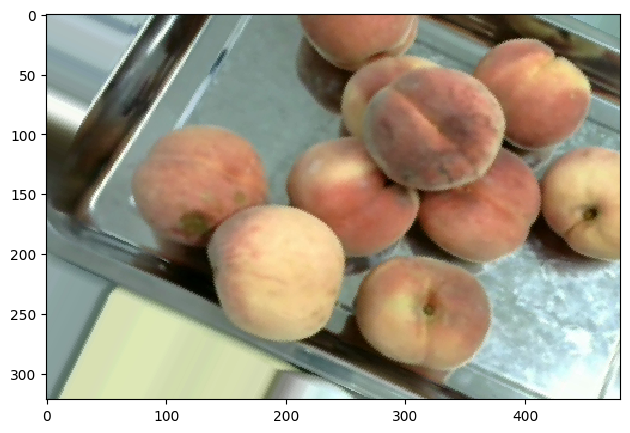

In [4]:
peach = io.imread(os.path.join(peach_dir, 'Peach001.png'))
io.imshow(peach)
io.show()

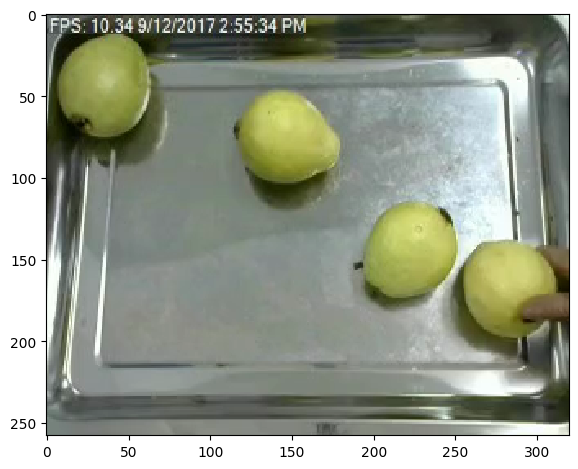

In [5]:
guava = io.imread(os.path.join(guava_dir, 'Guava1.png'))
io.imshow(guava)
io.show()

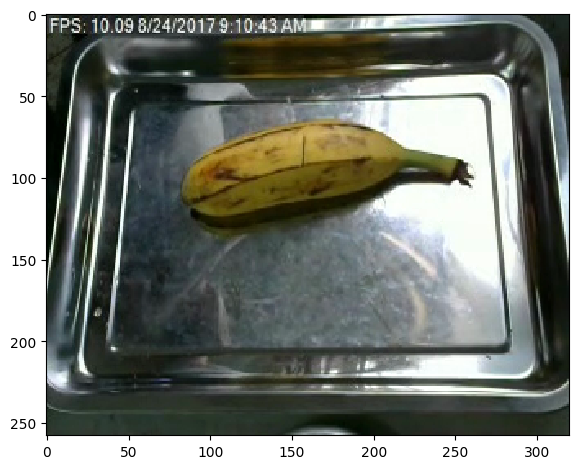

In [6]:
banana = io.imread(os.path.join(banana_dir, 'Banana01.png'))
io.imshow(banana)
io.show()

Now, let's process all of the images to add to a data array and label array

In [7]:
image_data = []
image_labels = []

Read in images from each directory, resize the images, and add them to data array with a corresponding value in the labels array:

In [8]:
for file in os.listdir(peach_dir):
    img_path = os.path.join(peach_dir, file)
    img = imread(img_path)
    img = resize(img, (25, 25))
    image_data.append(img.flatten())
    image_labels.append(0)

for file in os.listdir(banana_dir):
    img_path = os.path.join(banana_dir, file)
    img = imread(img_path)
    img = resize(img, (25, 25))
    image_data.append(img.flatten())
    image_labels.append(1)

for file in os.listdir(guava_dir):
    img_path = os.path.join(guava_dir, file)
    img = imread(img_path)
    img = resize(img, (25, 25))
    image_data.append(img.flatten())
    image_labels.append(2)

Convert the data and label lists to arrays

In [9]:
data_array = np.asarray(image_data)
label_array = np.asarray(image_labels)

## Classification

Split the data into separate training and testing sets using train_test_split

In [10]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data_array, label_array, test_size=0.1, shuffle=True, stratify=label_array)

Using a support vector classification (SVC) and grid search to classify fruit data

In [11]:
classifier = SVC()

parameters = [{'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'C': [0.1, 1, 10, 100, 1000]}]

grid_search = GridSearchCV(classifier, parameters)

grid_search.fit(x_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid=[{'C': [0.1, 1, 10, 100, 1000],
                          'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}])

### Test the performance

Use the best estimator found in the grid search to predict the y values and calculate an accuracy score

In [12]:
from sklearn.metrics import accuracy_score

y_pred = grid_search.best_estimator_.predict(x_test)

score = accuracy_score(y_pred, y_test)

print('Accuracy Score: ', score)

Accuracy Score:  0.8833333333333333


Trying a Random Forest Classifier:

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

forest_clf = RandomForestClassifier(random_state=42)
forest_clf.fit(x_train, y_train)

print(cross_val_score(forest_clf, x_train, y_train, cv=3, scoring="accuracy"))

[0.88888889 0.88268156 0.88268156]


## Confusion Matrix Data Visualization

A confusion matrix will show the number of times an image of fruit i is classified as a fruit of class j. We will use cross_val_predict to get a set of predictions to create our confusion matrix.

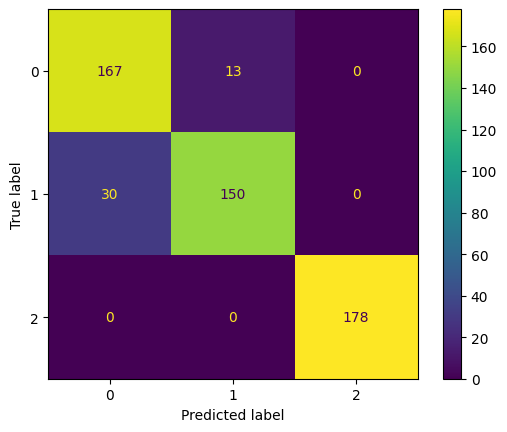

In [14]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_train_pred = cross_val_predict(grid_search, x_train, y_train)
plt.rc('font', size=10)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
plt.show()

## Resources Used:

https://www.kaggle.com/datasets/chrisfilo/fruit-recognition/

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

https://github.com/maptv/handson-ml3/blob/main/03_classification.ipynb

https://github.com/computervisioneng/image-classification-python-scikit-learn/blob/master/main.py

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
